## CIFAR_10 is a set of 60K images 32X32 pixels on 3 channels

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

#load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape : ', X_train.shape)
print('train samples : ', X_train.shape[0])
print('test samples: ', X_train.shape[1])

/Users/online1/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


X_train shape :  (50000, 32, 32, 3)
train samples :  50000
test samples:  32


Now let's do a one-hot encoding and normalize the images:

In [2]:
#convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [3]:
#network 
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [5]:
#train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
             metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                    epochs = NB_EPOCH, validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)
score = model.evaluate(X_test, Y_test,
                      batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 73s 2ms/step - loss: 1.7663 - acc: 0.3832 - val_loss: 1.4341 - val_acc: 0.4856
Epoch 2/20
40000/40000 [==============================] - 72s 2ms/step - loss: 1.3788 - acc: 0.5070 - val_loss: 1.2889 - val_acc: 0.5419
Epoch 3/20
40000/40000 [==============================] - 70s 2ms/step - loss: 1.2538 - acc: 0.5579 - val_loss: 1.1645 - val_acc: 0.5918
Epoch 4/20
40000/40000 [==============================] - 73s 2ms/step - loss: 1.1600 - acc: 0.5899 - val_loss: 1.3181 - val_acc: 0.5326
Epoch 5/20
40000/40000 [==============================] - 83s 2ms/step - loss: 1.0889 - acc: 0.6149 - val_loss: 1.1623 - val_acc: 0.5960
Epoch 6/20
40000/40000 [==============================] - 76s 2ms/step - loss: 1.0316 - acc: 0.6384 - val_loss: 1.0894 - val_acc: 0.6204
Epoch 7/20
40000/40000 [==============================] - 71s 2ms/step - loss: 0.9833 - acc: 0.6559 - val_loss: 1.0345 - val_acc

In [6]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
#And the weights learned by our deep networks ont he training set 
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


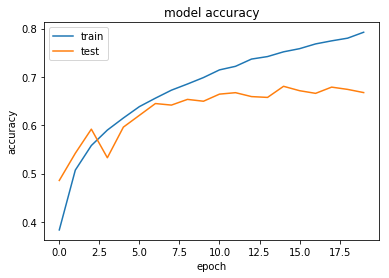

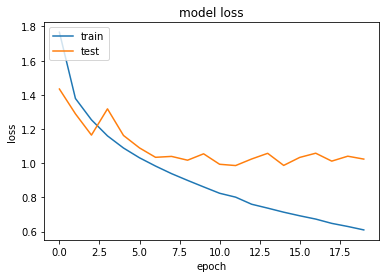

In [7]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Improving the CIFAR-10 performance with deeper a network
One way to improve the performance is to define a deeper network with multiple convolutional operations. In this example, we have a sequence of modules:

conv+conv+maxpool+dropout+conv+conv+maxpool

Followed by a standard dense+dropout+dense. All the activation functions are ReLU.

Let us see the code for the new network:

In [ ]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

#Model
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(521))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

#train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
             metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                    epochs = NB_EPOCH, validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE)
score = model.evaluate(X_test, Y_test,
                      batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
#And the weights learned by our deep networks ont he training set 
model.save_weights('cifar10_weights.h5', overwrite=True)

import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/Users/online1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
__________

## Improving the CIFAR-10 performance with data augmentation
Another way to improve the performance is to generate more images for our training.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import numpy as np
NUM_TO_AUGMENT = 5

#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#augmenting
print("Augmenting training set images ...")
datagen = ImageDataGenerator(rotation_range =40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')
print('Augmentation completed..')

In [ ]:
print(X_train.shape[0])
xtas, ytas= [], []
for i in range(X_train.shape[0]):
    num_aug = 0
    x = X_train[i] #(3, 32, 32)
    x = x.reshape((1,) + x.shape) # (1, 3, 32, 32)
    for x_aug in datagen.flow(x, batch_size=1,
                             save_to_dir='preview', save_prefix='cifar', save_format='jpeg'):
        if num_aug >= NUM_TO_AUGMENT:
            break
            xtas.append(x_aug[0])
            num_aug += 1

In [ ]:
#fit the dataget
datagen.fit(X_train)

#train
history = model.fit_generator(datagen.flow(X_train, Y_train,
                                          batch_size=BATCH_SIZE), samples_per_epoch=X_train.shape[0],
                             epochs=NB_EPOCH, verbose=VERBOSE)
score = model.evaluate(X_train, Y_test, 
                      batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score: ", score[0])
print(("Test accuracy: ", score[1]))

## Predicting with CIFAR-10
Now let us suppose that we want to use the deep learning model we just trained for CIFAR-10 for a bulk evaluation of images. Since we saved the model and the weights, we do not need to train every time:

In [ ]:
import numpy as np
import scipy.misc
from keras.models import model_from_json
from keras.optimizers import SGD

#load model
model_architecture = 'cifar10_architecture.json'
model_weights = 'cifar10_weights.h5'
model = model_from_json(open(model_architecture).read())
model.load(weights(model_weights))

#load images
img_names = ['cat-standing.jpg', 'dog.jpg']
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_name), (32, 32)),
                    (1, 0, 2)).astype('float32')
       for img_name in img_names]
imgs = np.array(imgs) / 255

#train
optim = SGD()
model.compile(loss='categorical_crossentropy', optimizer=optim,
             metrics=['accuracy'])

#predict 
predictions = model.predict_class(imgs)
print(predictions)